In [26]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import scipy as scipy
from skimage import io
from skimage import data
from scipy.signal import convolve2d
from scipy import stats

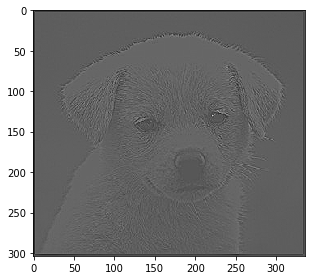

In [30]:
image = io.imread('dog.jpg', as_gray=True)
kernel_blur = [[ 0.002969,  0.013306,  0.021938,  0.013306,  0.002969],
       [ 0.013306,  0.059634,  0.09832 ,  0.059634,  0.013306],
       [ 0.021938,  0.09832 ,  0.162103,  0.09832 ,  0.021938],
       [ 0.013306,  0.059634,  0.09832 ,  0.059634,  0.013306],
       [ 0.002969,  0.013306,  0.021938,  0.013306,  0.002969]]
features_blur = convolve2d(image, kernel_blur)

kernel_laplacian = [[ 0.0, 0.0, -1.0, 0.0, 0.0],
                    [ 0.0, -1.0, -2.0, -1.0, 0.0],
                    [ -1.0, -2.0, 16.0, -2.0, -1.0],
                    [ 0.0, -1.0, -2.0, .0, 0.0],
                    [ 0.0, 0.0, -1.0, 0.0, 0.0]]
features = convolve2d(image, kernel_laplacian)

#Normalize between 0.0 and 1.0
features = (features - np.min(features)) / np.ptp(features)
io.imshow(features, cmap='gray')

In [27]:
scipy.version.full_version

'1.1.0'

In [1]:
import talos as ta
from keras.models import Sequential
from keras.layers import Dense

def minimal():

     x, y = ta.datasets.iris()

     p = {'activation':['relu', 'elu'],
          'optimizer': ['Nadam', 'Adam'],
          'losses': ['logcosh'],
          'hidden_layers':[0, 1, 2],
          'batch_size': [20,30,40],
          'epochs': [10,20]}

     def iris_model(x_train, y_train, x_val, y_val, params):

         model = Sequential()
         model.add(Dense(32, input_dim=8, activation=params['activation']))
         model.add(Dense(1, activation='softmax'))
         model.compile(optimizer=params['optimizer'], loss=params['losses'])

         out = model.fit(x_train, y_train,
                         batch_size=params['batch_size'],
                         epochs=params['epochs'],
                         validation_data=[x_val, y_val])

         return out, model

     scan_object = ta.Scan(x, y, model=iris_model, params=p, grid_downsample=0.1)
     
     return scan_object

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/chances/plots.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-p